# Multiple Linear Regression

## Importing the libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [59]:
df =pd.read_csv('/content/Successful_Startups.csv')

In [ ]:
df

,R&D Spend,Administration,Marketing Spend,Season,Profit
0,165349.20,136897.80,471784.10,Season1,192261.83
1,162597.70,151377.59,443898.53,Season2,191792.06
2,153441.51,101145.55,407934.54,Season3,191050.39
3,144372.41,118671.85,383199.62,Season1,182901.99
4,142107.34,91391.77,366168.42,Season3,166187.94
5,131876.90,99814.71,362861.36,Season1,156991.12
6,134615.46,147198.87,127716.82,Season2,156122.51
7,130298.13,145530.06,323876.68,Season3,155752.60
8,120542.52,148718.95,311613.29,Season1,152211.77
9,123334.88,108679.17,304981.62,Season2,149759.96


In [60]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [61]:
print("Type of x:", type(x))
print("Shape of x before encoding:", x.shape)
print("Type of y:", type(y))
print("Shape of y:", y.shape)

Type of x: <class 'numpy.ndarray'>
Shape of x before encoding: (50, 4)
Type of y: <class 'numpy.ndarray'>
Shape of y: (50,)


In [9]:
x

array([[165349.2, 136897.8, 471784.1, 'Season1'],
       [162597.7, 151377.59, 443898.53, 'Season2'],
       [153441.51, 101145.55, 407934.54, 'Season3'],
       [144372.41, 118671.85, 383199.62, 'Season1'],
       [142107.34, 91391.77, 366168.42, 'Season3'],
       [131876.9, 99814.71, 362861.36, 'Season1'],
       [134615.46, 147198.87, 127716.82, 'Season2'],
       [130298.13, 145530.06, 323876.68, 'Season3'],
       [120542.52, 148718.95, 311613.29, 'Season1'],
       [123334.88, 108679.17, 304981.62, 'Season2'],
       [101913.08, 110594.11, 229160.95, 'Season3'],
       [100671.96, 91790.61, 249744.55, 'Season2'],
       [93863.75, 127320.38, 249839.44, 'Season3'],
       [91992.39, 135495.07, 252664.93, 'Season2'],
       [119943.24, 156547.42, 256512.92, 'Season3'],
       [114523.61, 122616.84, 261776.23, 'Season1'],
       [78013.11, 121597.55, 264346.06, 'Season2'],
       [94657.16, 145077.58, 282574.31, 'Season1'],
       [91749.16, 114175.79, 294919.57, 'Season3'],
      

## Encoding categorical data

In [62]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = ct.fit_transform(x)


In [65]:
x

array([[1.0, 0.0, 0.0, 165349.2, 136897.8, 471784.1],
       [0.0, 1.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 0.0, 1.0, 153441.51, 101145.55, 407934.54],
       [1.0, 0.0, 0.0, 144372.41, 118671.85, 383199.62],
       [0.0, 0.0, 1.0, 142107.34, 91391.77, 366168.42],
       [1.0, 0.0, 0.0, 131876.9, 99814.71, 362861.36],
       [0.0, 1.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 0.0, 1.0, 130298.13, 145530.06, 323876.68],
       [1.0, 0.0, 0.0, 120542.52, 148718.95, 311613.29],
       [0.0, 1.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 0.0, 1.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 0.0, 1.0, 93863.75, 127320.38, 249839.44],
       [0.0, 1.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 0.0, 1.0, 119943.24, 156547.42, 256512.92],
       [1.0, 0.0, 0.0, 114523.61, 122616.84, 261776.23],
       [0.0, 1.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1.0, 0.0, 0.0, 94657.16, 145077.58

## Splitting the dataset into the Training set and Test set

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [64]:
x_train

array([[0.0, 0.0, 1.0, 55493.95, 103057.49, 214634.81],
       [1.0, 0.0, 0.0, 46014.02, 85047.44, 205517.64],
       [0.0, 0.0, 1.0, 75328.87, 144135.98, 134050.07],
       [0.0, 1.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 0.0, 1.0, 91749.16, 114175.79, 294919.57],
       [0.0, 0.0, 1.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 119943.24, 156547.42, 256512.92],
       [1.0, 0.0, 0.0, 1000.23, 124153.04, 1903.93],
       [1.0, 0.0, 0.0, 542.05, 51743.15, 0.0],
       [1.0, 0.0, 0.0, 65605.48, 153032.06, 107138.38],
       [1.0, 0.0, 0.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 1.0, 61994.48, 115641.28, 91131.24],
       [0.0, 1.0, 0.0, 63408.86, 129219.61, 46085.25],
       [0.0, 1.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 0.0, 23640.93, 96189.63, 148001.11],
       [0.0, 1.0, 0.0, 76253.86, 113867.3, 298664.47],
       [1.0, 0.0, 0.0, 15505.73, 127382.3, 35534.17],
       [1.0, 0.0, 0.0, 120542.52, 148718.95, 311613.29],
       

In [66]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

## Training the Multiple Linear Regression model on the Training set

In [67]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

## Predicting the Test set results

In [68]:
y_pred = regressor.predict(x_test)

In [69]:
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [27]:
np.set_printoptions(precision=2)

In [70]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Visualize the result to check accuracy

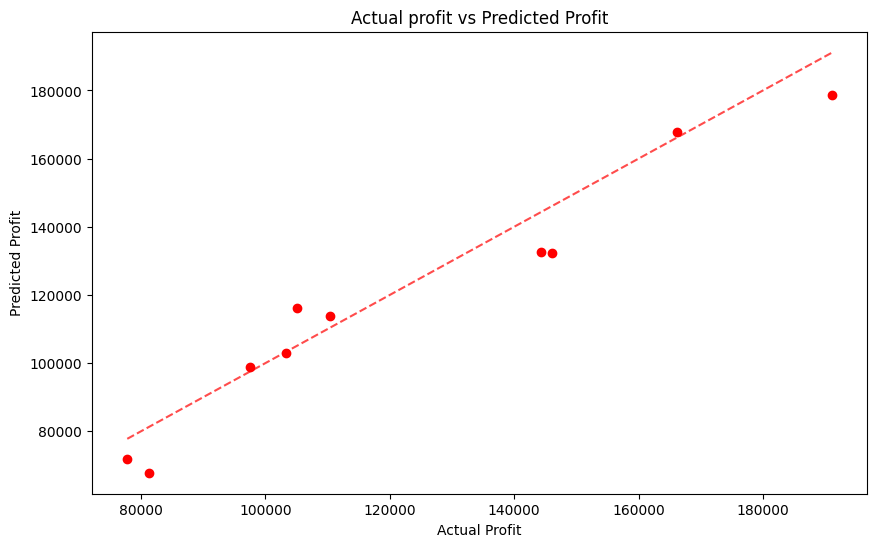

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred,color = 'red')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual profit vs Predicted Profit')
plt.plot([min(y_test),max(y_test)],[min(y_test), max(y_test)],color = 'red' , alpha =0.7, linestyle ='--')
plt.show()



